In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import tensorflow as tf
import random
from cv2 import resize
from glob import glob

import warnings
warnings.filterwarnings("ignore")

In [2]:
img_height = 244
img_width = 244
train_ds = tf.keras.utils.image_dataset_from_directory(
  'C:\\Users\\Dhairya Hindoriya\\OneDrive\\Desktop\\Solar panel fault detection\\Faulty_solar_panel',
  validation_split=0.2,
  subset='training',
  image_size=(img_height, img_width),
  batch_size=32,
  seed=42,
  shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory(
  'C:\\Users\\Dhairya Hindoriya\\OneDrive\\Desktop\\Solar panel fault detection\\Faulty_solar_panel',
  validation_split=0.2,
  subset='validation',
  image_size=(img_height, img_width),
  batch_size=32,
  seed=42,
  shuffle=True)

Found 885 files belonging to 6 classes.
Using 708 files for training.
Found 885 files belonging to 6 classes.
Using 177 files for validation.


In [3]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 244, 244, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

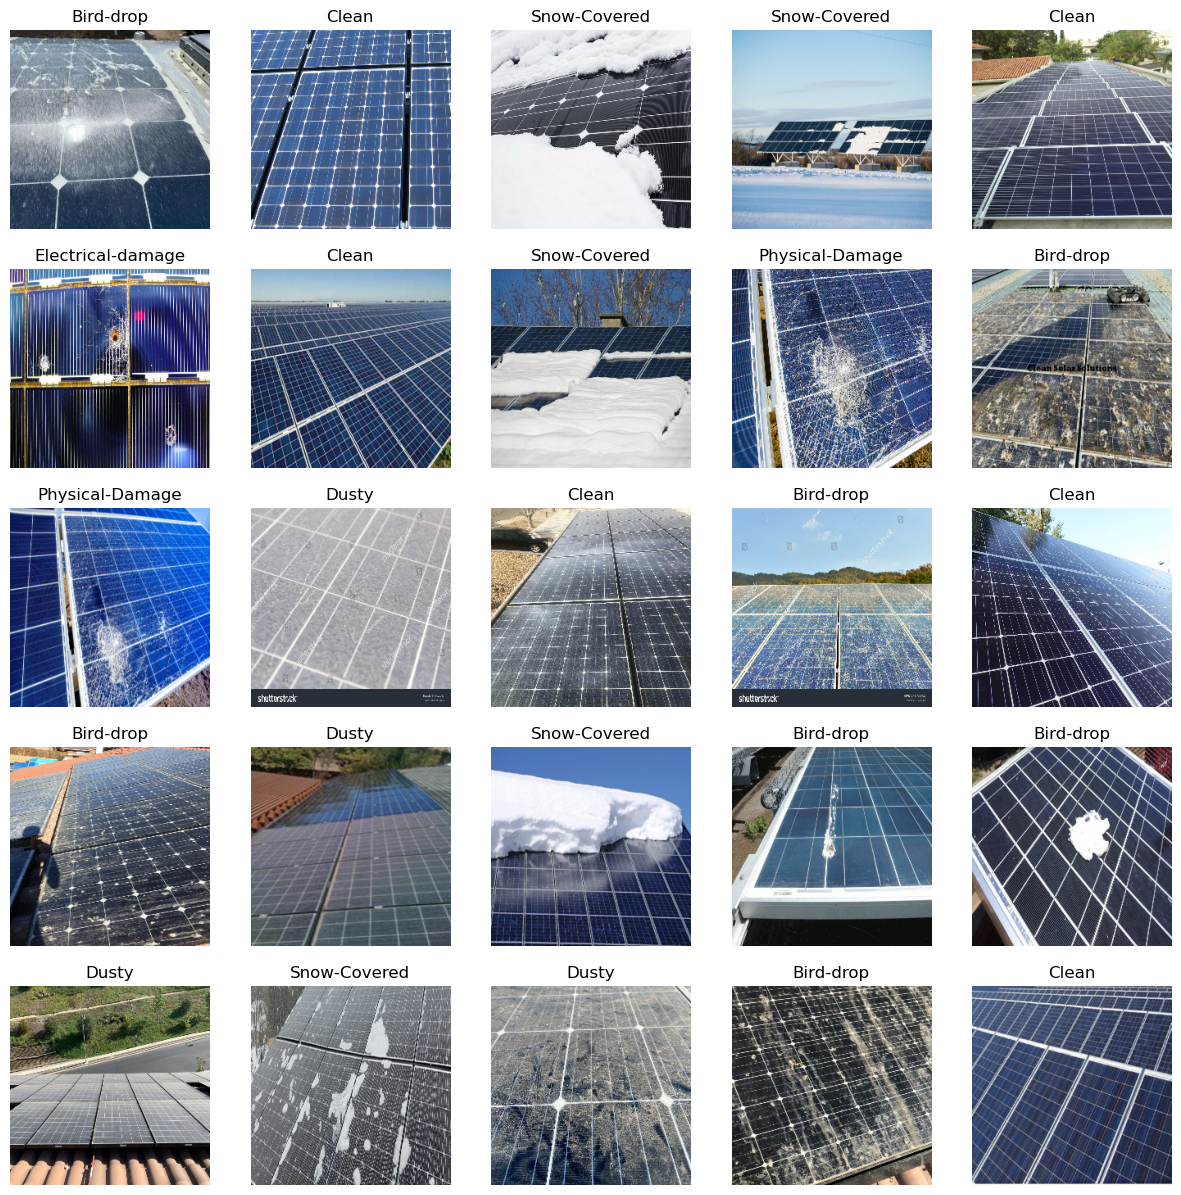

In [4]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Model Training

In [5]:
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False 

In [6]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = tf.keras.applications.vgg16.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(90)(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 244, 244, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 244, 244, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                             

In [7]:
pip install pydot 


  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.7
    Uninstalling pyparsing-2.4.7:
      Successfully uninstalled pyparsing-2.4.7
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\dhairya hindoriya\anaconda3\lib\site-packages\object_detection-0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires lvis, which is not installed.
object-detection 0.1 requires sacrebleu<=2.2.0, which is not installed.
object-detection 0.1 requires tensorflow_io, which is not installed.
object-detection 0.1 requires tf-models-official>=2.5.1, which is not installed.
object-detection 0.1 requires tf-slim, which is not installed.
object-detection 0.1 requires pyparsin

DEPRECATION: Loading egg at c:\users\dhairya hindoriya\anaconda3\lib\site-packages\object_detection-0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


  Using cached visualkeras-0.1.3-py3-none-any.whl.metadata (11 kB)
  Using cached aggdraw-1.3.18.post0-cp311-cp311-win_amd64.whl.metadata (679 bytes)
Using cached visualkeras-0.1.3-py3-none-any.whl (16 kB)
Using cached aggdraw-1.3.18.post0-cp311-cp311-win_amd64.whl (44 kB)


ValueError: Could not save to JPEG for display

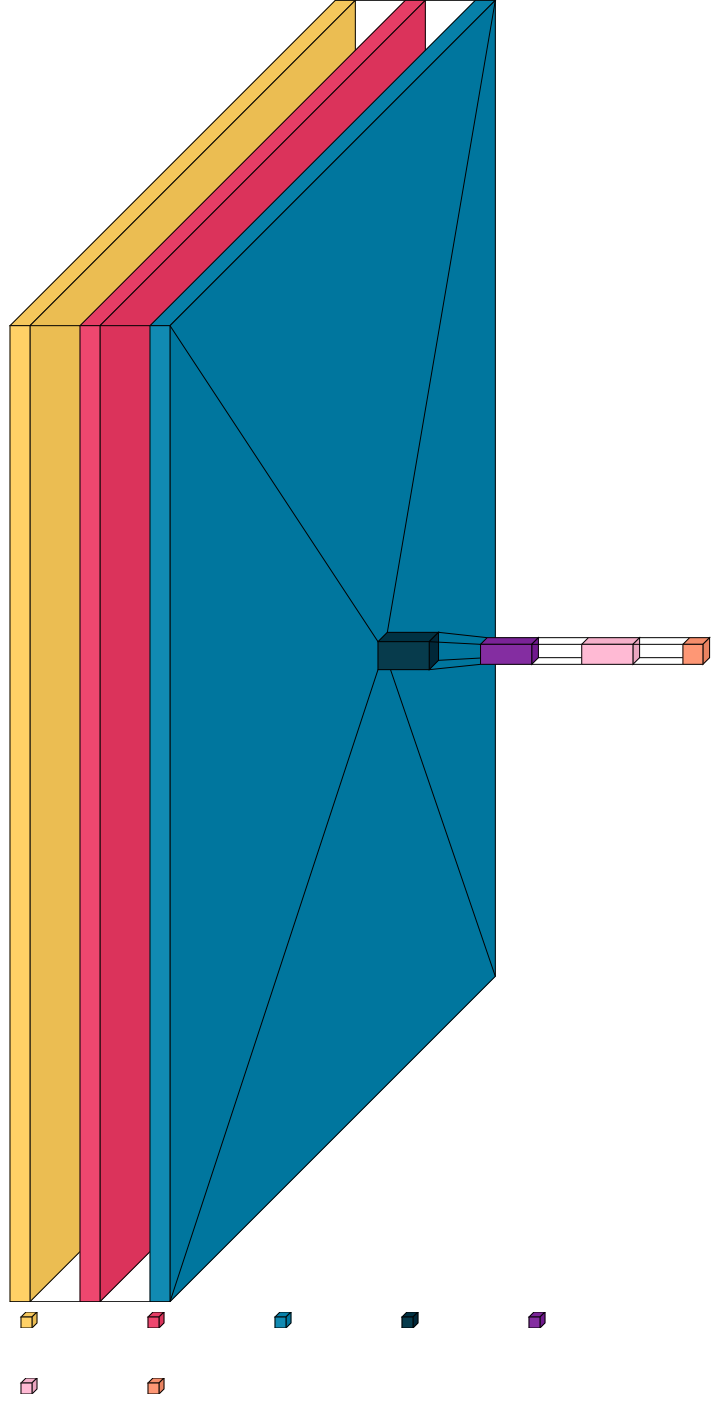

In [8]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model,legend=True,spacing=50,background_fill = 'white')

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
epoch = 15
model.fit(train_ds, validation_data=val_ds, epochs=epoch,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=3,
            verbose=1,
            restore_best_weights=True
        )
    ]
)

Epoch 1/15


23/23 [==============================] - 157s 7s/step - loss: 10.3051 - accuracy: 0.1003 - val_loss: 4.2631 - val_accuracy: 0.2316
Epoch 2/15
23/23 [==============================] - 162s 7s/step - loss: 4.5301 - accuracy: 0.3051 - val_loss: 2.6196 - val_accuracy: 0.3842
Epoch 3/15
23/23 [==============================] - 163s 7s/step - loss: 3.3225 - accuracy: 0.4167 - val_loss: 1.9714 - val_accuracy: 0.5141
Epoch 4/15
23/23 [==============================] - 173s 7s/step - loss: 2.5397 - accuracy: 0.4718 - val_loss: 1.5784 - val_accuracy: 0.5537
Epoch 5/15
23/23 [==============================] - 167s 7s/step - loss: 2.3019 - accuracy: 0.5452 - val_loss: 1.3903 - val_accuracy: 0.6215
Epoch 6/15
23/23 [==============================] - 177s 8s/step - loss: 1.8592 - accuracy: 0.5918 - val_loss: 1.2264 - val_accuracy: 0.6554
Epoch 7/15
23/23 [==============================] - 172s 7s/step - loss: 1.6090 - accuracy: 0.6455 - val_loss: 1.1980 - val_accuracy: 0.6780
Epoch 8/15

In [11]:
#fine tuning
base_model.trainable = True
for layer in base_model.layers[:14]:
    layer.trainable = False
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 tf.__operators__.getitem (  (None, 244, 244, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 244, 244, 3)       0         
 )                                                               
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                             

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
epoch = 15
history = model.fit(train_ds, validation_data=val_ds, epochs=epoch,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=1e-2,
            patience=3,
            verbose=1,
        )
    ]
)

Epoch 1/15
23/23 [==============================] - 173s 7s/step - loss: 0.1055 - accuracy: 0.9689 - val_loss: 0.5578 - val_accuracy: 0.7966
Epoch 2/15
23/23 [==============================] - 195s 8s/step - loss: 0.0564 - accuracy: 0.9873 - val_loss: 0.6576 - val_accuracy: 0.8362
Epoch 3/15
23/23 [==============================] - 200s 8s/step - loss: 0.0682 - accuracy: 0.9873 - val_loss: 0.6123 - val_accuracy: 0.8362
Epoch 4/15
23/23 [==============================] - 177s 8s/step - loss: 0.0338 - accuracy: 0.9859 - val_loss: 0.7399 - val_accuracy: 0.8475
Epoch 4: early stopping


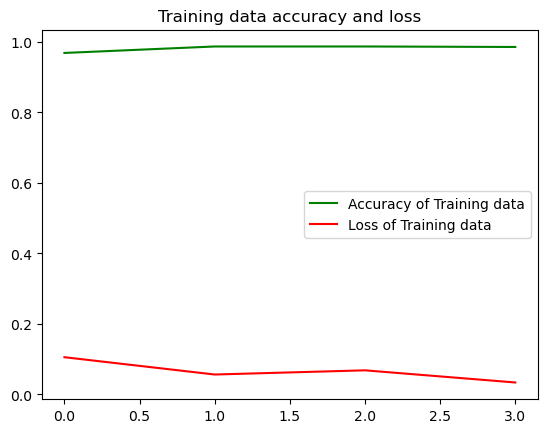

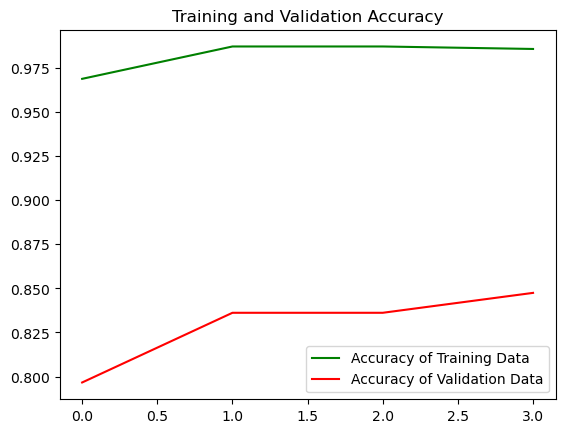

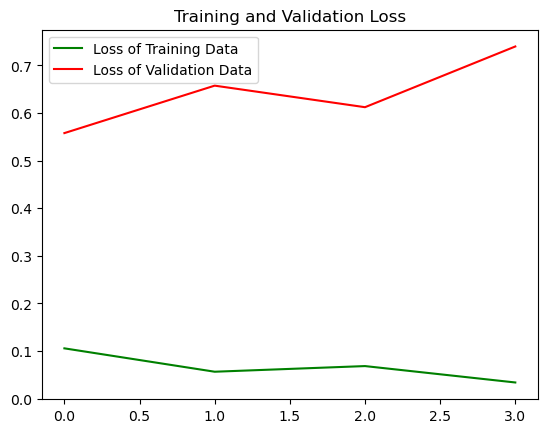

<Figure size 640x480 with 0 Axes>

In [15]:
get_ac = history.history['accuracy']
get_los = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

1/1 [==============================] - 0s 202ms/step


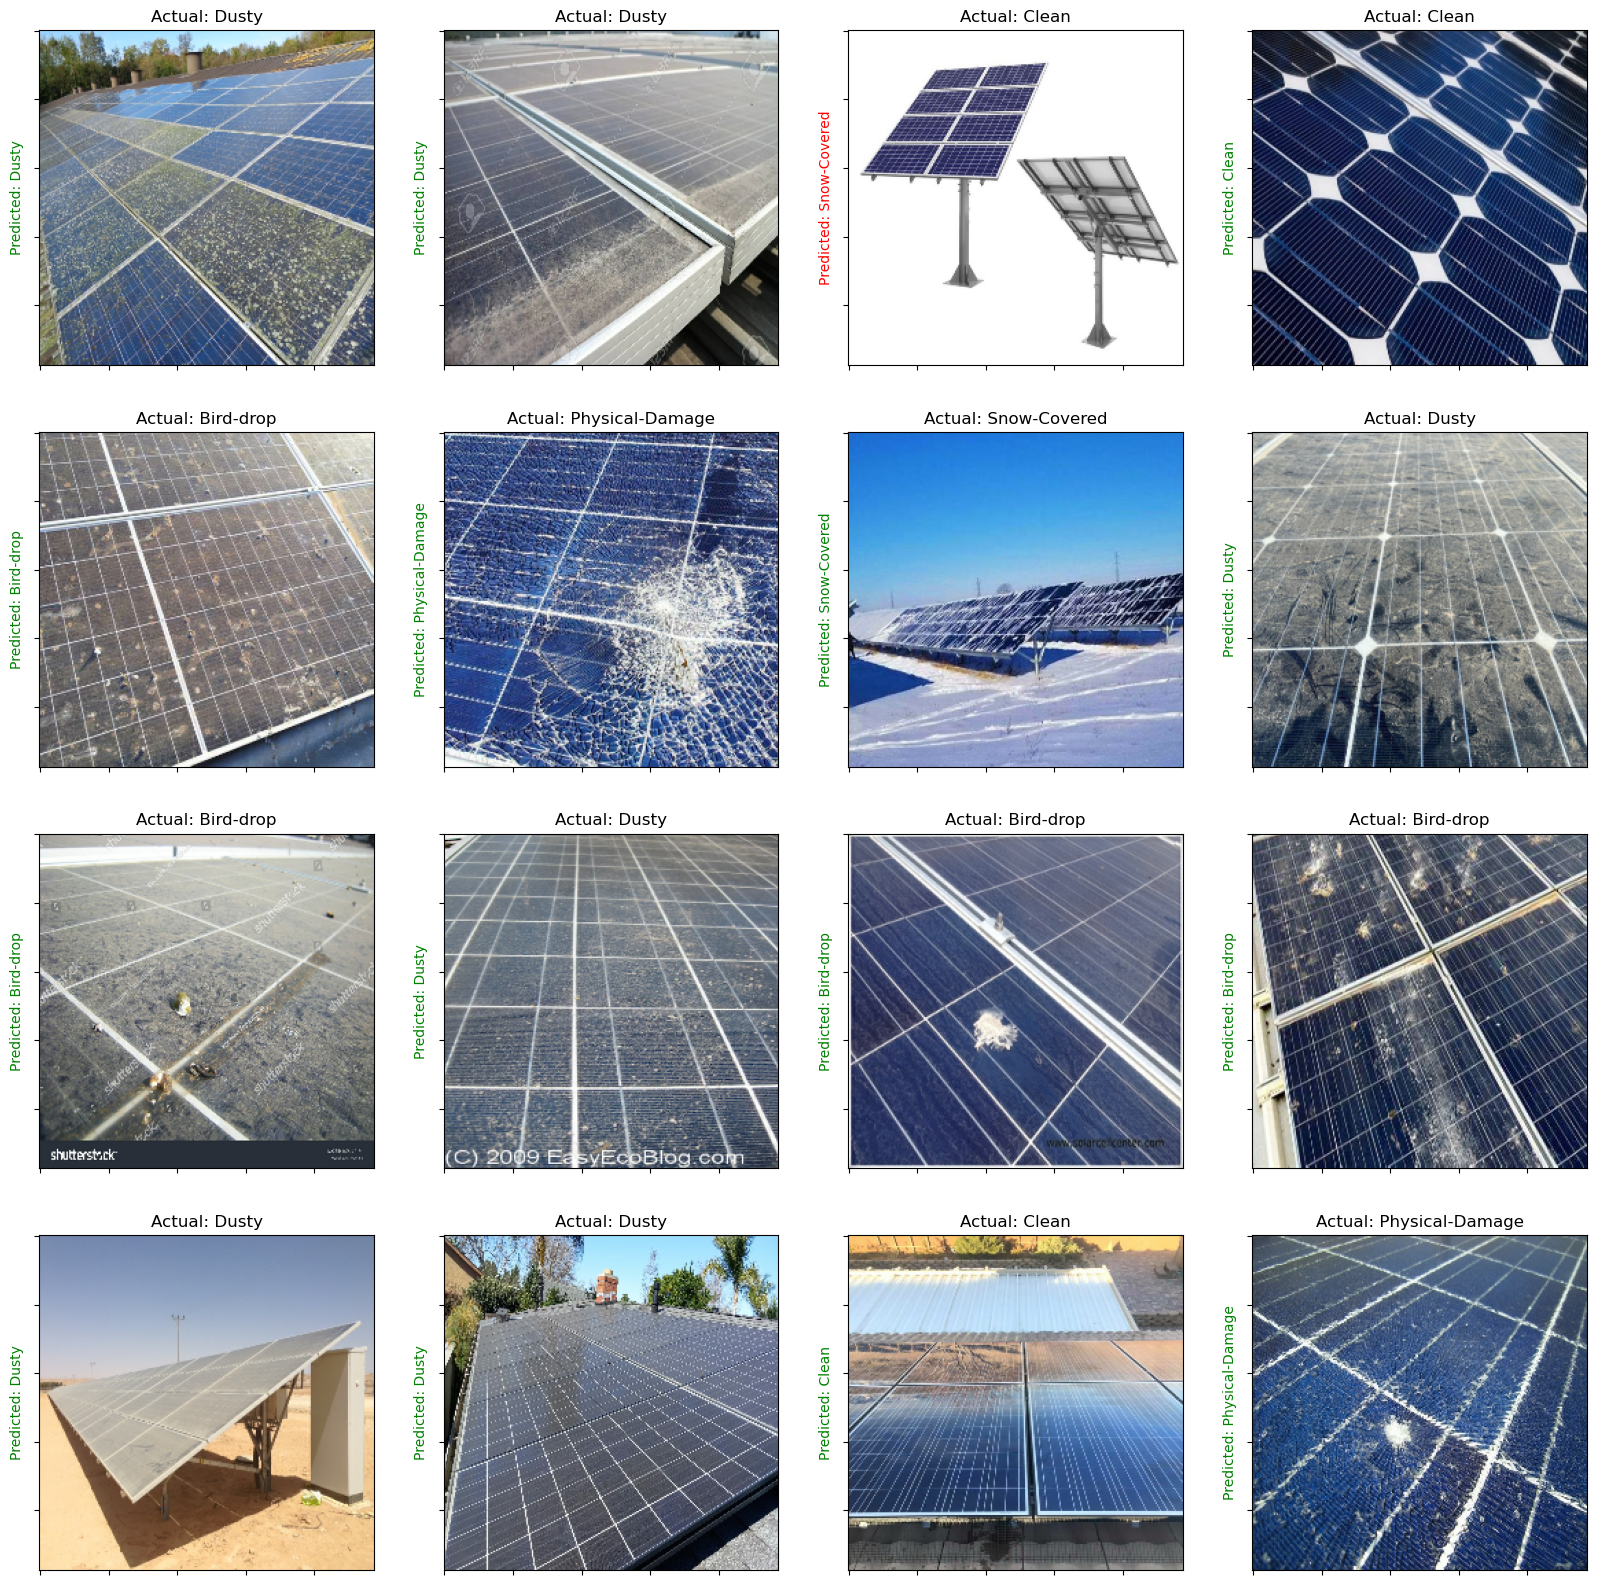

In [16]:
oss, accuracy = model.evaluate(val_ds)

plt.figure(figsize=(20, 20))
for images, labels in val_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])